In [215]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
%matplotlib inline
from IPython.display import display, HTML

messageVolume = 100
messageSize = 1000
garbageCollector = "EPSILON"
isMultiThreaded = 0

profiledData = pd.read_csv('profiling_test_results.csv', sep='\t')

jeroMQfilteredData = profiledData.query('REQUESTTYPE == "JEROMQ" and GARBAGECOLLECTOR == @garbageCollector and ISMULTITHREADED == @isMultiThreaded and MESSAGESIZE == 10000 and MESSAGEVOLUME == 100')
jeroMQfilteredData = jeroMQfilteredData[jeroMQfilteredData["RECEIVETIME"] != '\\N']

In [216]:
jeroSendTime = pd.to_datetime(jeroMQfilteredData["SENDTIME"])
jeroReceiveTime = pd.to_datetime(jeroMQfilteredData["RECEIVETIME"])

jero_mean_df = jeroMQfilteredData.copy()
jeroDuration = jeroReceiveTime - jeroSendTime
jeroMeanDuration = jeroDuration.mean()
print(jeroMeanDuration)

jero_mean_df['sendReceiveDuration'] = jeroDuration

0 days 00:00:00.038410


In [217]:
springAMQPfilteredData = profiledData.query('REQUESTTYPE == "SPRING AMQP" and GARBAGECOLLECTOR == @garbageCollector and ISMULTITHREADED == @isMultiThreaded and MESSAGESIZE == 10000 and MESSAGEVOLUME == 100')
springAMQPfilteredData = springAMQPfilteredData[springAMQPfilteredData["RECEIVETIME"] != '\\N']

In [218]:
springSendTime = pd.to_datetime(springAMQPfilteredData["SENDTIME"])
springReceiveTime = pd.to_datetime(springAMQPfilteredData["RECEIVETIME"])

spring_mean_df = springAMQPfilteredData.copy()
springDuration = springReceiveTime - springSendTime
springMeanDuration = springDuration.mean()
print(springMeanDuration)

spring_mean_df['sendReceiveDuration'] = springDuration

0 days 00:00:00.195970


In [219]:
raabbitClientFilteredData = profiledData.query('REQUESTTYPE == "RABBITMQ JAVA CLIENT" and GARBAGECOLLECTOR == @garbageCollector and ISMULTITHREADED == @isMultiThreaded and MESSAGESIZE == 10000 and MESSAGEVOLUME == 100')
raabbitClientFilteredData = raabbitClientFilteredData[raabbitClientFilteredData["RECEIVETIME"] != '\\N']

In [220]:
rcSendTime = pd.to_datetime(raabbitClientFilteredData["SENDTIME"])
rcReceiveTime = pd.to_datetime(raabbitClientFilteredData["RECEIVETIME"])

rc_mean_df = raabbitClientFilteredData.copy()
rcDuration = rcReceiveTime - rcSendTime
rcMeanDuration = rcDuration.mean()
print(rcMeanDuration)

rc_mean_df['sendReceiveDuration'] = rcDuration

0 days 00:00:00.109420


In [221]:
jzmqfilteredData = profiledData.query('REQUESTTYPE == "JZMQ" and GARBAGECOLLECTOR == @garbageCollector and ISMULTITHREADED == @isMultiThreaded and MESSAGESIZE == 10000 and MESSAGEVOLUME == 100')
jzmqfilteredData = jzmqfilteredData[jzmqfilteredData["RECEIVETIME"] != '\\N']

In [222]:
jzmqSendTime = pd.to_datetime(jzmqfilteredData["SENDTIME"])
jzmqReceiveTime = pd.to_datetime(jzmqfilteredData["RECEIVETIME"])

jzmq_mean_df = jzmqfilteredData.copy()
jzmqDuration = jzmqReceiveTime - jzmqSendTime
jzmqMeanDuration = jzmqDuration.mean()

jzmq_mean_df['sendReceiveDuration'] = jzmqDuration

In [223]:
meanTimeData = [["JZMQ", garbageCollector, isMultiThreaded, messageVolume, messageSize, jzmqMeanDuration],
                ["JEROMQ", garbageCollector, isMultiThreaded, messageVolume, messageSize, jeroMeanDuration], 
                ["RABBITMQ JAVA CLIENT", garbageCollector, isMultiThreaded, messageVolume, messageSize, rcMeanDuration], 
                ["SPRING AMQP", garbageCollector, isMultiThreaded, messageVolume, messageSize, springMeanDuration] 
               ]
meanDataframe = pd.DataFrame(meanTimeData, columns=["REQUEST TYPE", "GARBAGE COLLECTOR", "MULTITHREADED?", "MESSAGE VOLUME", "MESSAGE SIZE(bytes)", "MEAN SEND/RECEIVE DURATION"])
display(HTML(meanDataframe.to_html()))

,REQUEST TYPE,GARBAGE COLLECTOR,MULTITHREADED?,MESSAGE VOLUME,MESSAGE SIZE(bytes),MEAN SEND/RECEIVE DURATION
0,JZMQ,EPSILON,0,100,1000,00:00:00.110181
1,JEROMQ,EPSILON,0,100,1000,00:00:00.038410
2,RABBITMQ JAVA CLIENT,EPSILON,0,100,1000,00:00:00.109420
3,SPRING AMQP,EPSILON,0,100,1000,00:00:00.195970


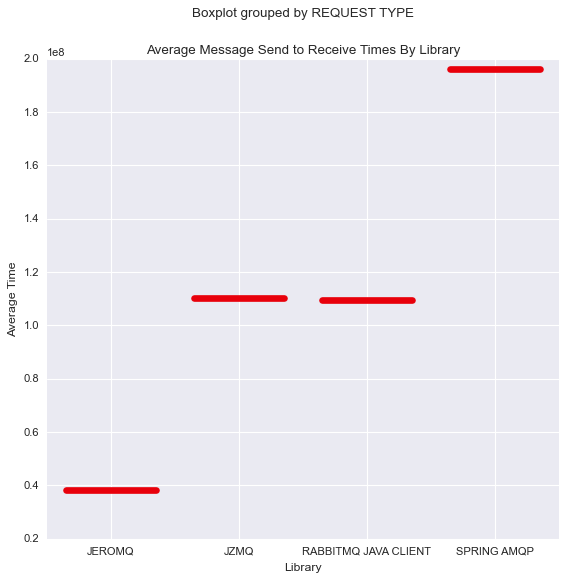

In [291]:
plt.style.use('seaborn-bright')

medianprops = {'linewidth': 6}
bplot = meanDataframe.boxplot(column='MEAN SEND/RECEIVE DURATION', by='REQUEST TYPE', 
                      widths = 0.7, figsize=(8,8), fontsize=10, medianprops=medianprops)

plt.xlabel('Library')
plt.ylabel('Average Time')
plt.title('Average Message Send to Receive Times By Library')
        
plt.show()